In [1]:
import rasterio
import numpy as np
from rasterio.plot import adjust_band
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_raster, reshape_as_image
from rasterio.plot import show
from rasterio.windows import Window
from pyproj import Proj, transform

## First let's inspect our labeled landcover dataset

In [2]:
# Open our raster dataset
label_dataset = rasterio.open('/deep_data/landcover_reproject.tif')
label_image = label_dataset.read()

# How many bands does this image have?
num_bands = label_dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = label_dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# What driver was used to open the raster?
driver = label_dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = label_dataset.crs
print('Image projection:')
print(proj)

Number of bands in image: 1

Image size is: 17107 rows x 21332 columns

Raster driver: GTiff

Image projection:
EPSG:32618


### What is the pixel size?

In [3]:
gt = label_dataset.transform
print(gt)

| 30.00, 0.00,-130215.00|
| 0.00,-30.00, 4187595.00|
| 0.00, 0.00, 1.00|


In [4]:
pixelSizeX = gt[0]
pixelSizeY =-gt[4]

print(pixelSizeX)
print(pixelSizeY)

30.0
30.0


#### What is the image shape?

In [5]:
label_image.shape

(1, 17107, 21332)

#### how many classes are there?

In [6]:
np.unique(label_image)

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22, 255], dtype=uint8)

#### For now I'm just combining all pixels currently classified as 255 into class 1

But it might be worth combining other classes here too and saving out the raster as something new


In [8]:
label_image[label_image == 255] = 1

Let's take a look at it

KeyboardInterrupt: 

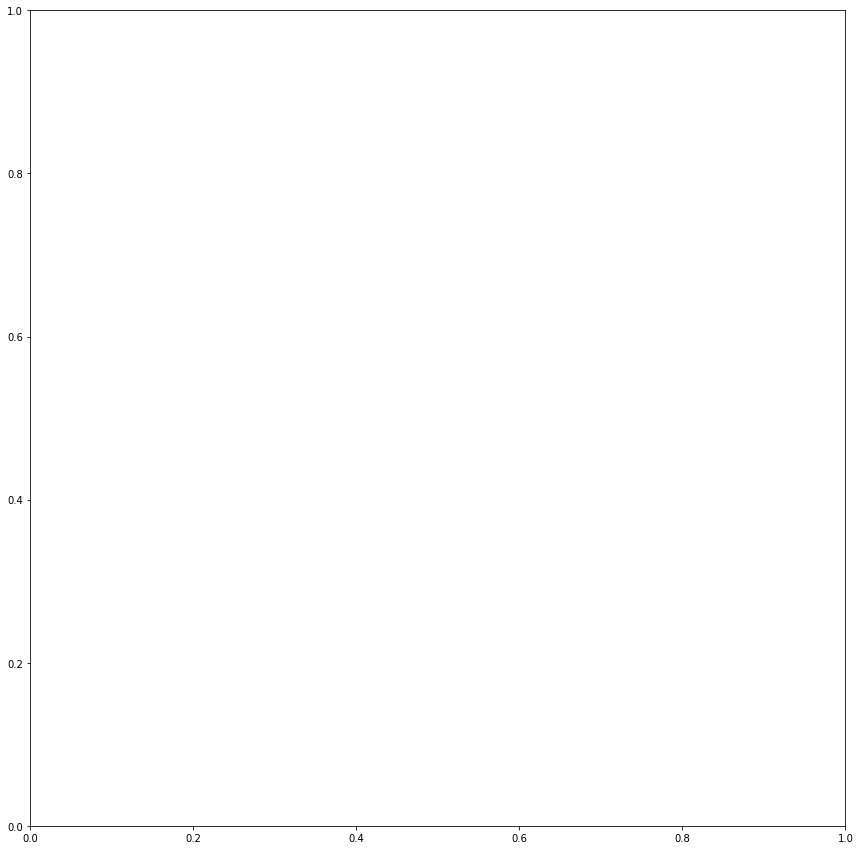

In [9]:
fig, ax = plt.subplots(figsize=[15,15])
ax.imshow(label_image[0,:,:])

Since that isn't very informative let's add a colormap and visualize what's really there

In [ ]:
# next setup a colormap for our map
colors = dict((
(0, (245,245,245, 255)), # Background
(1, (0,0,0)), # Unclassified (Cloud, Shadow, etc)
(2, (255,0,0)), # High Intensity Developed
(3, (255, 110, 51)), # Medium Intensity Developed
(4, (255, 162, 51)), # Low Intensity Developed
(5, (255, 162, 51)), # Open Space Developed
(6, (162, 89, 0)), # Cultivated Land
(7, (229, 221, 50)), # Pasture/Hay
(8, (185, 251, 96)), # Grassland
(9, (83, 144, 0)), # Deciduous Forest
(10, (13, 118, 0  )), # Evergreen Forest
(11, (62, 178, 49)), # Mixed Forest
(12, (100, 241, 125)), # Scrub/Shrub
(13, (68, 160, 85)), # Palustrine Forested Wetland
(14, (118, 192, 131)), # Palustrine Scrub/Shrub Wetland
(15, (188, 0, 211)), # Palustrine Emergent Wetland
(16, (188, 0, 211)), # Estuarine Forested Wetland
(17, (0, 0, 0)), # Estuarine Scrub/Shrub Wetland
(18, (172, 0, 191)), # Estuarine Emergent Wetland
(19, (159, 251, 255)), # Unconsolidated Shore 
(20, (172, 177, 68)), # Bare Land
(21, (29, 0, 189)), # Water
(22, (29, 0, 189)), # Palustrine Aquatic Bed
(23, (91, 199, 169)), # Estuarine Aquatic Bed
(24, (159, 251, 255)), # Tundra
(25, (159, 251, 255)), # Snow/Ice
))

n = int(np.max(label_image))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(0, n)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n)

# Now show the class map next to the RGB image

fig, axs = plt.subplots(figsize=(15,15))

axs.imshow(label_image[0,:, :], cmap=cmap, interpolation='none')
#axs.imshow(image[0,:, :], cmap=cmap, interpolation='none')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
show_hist(label_dataset, ax=ax, bins=len(np.unique(label_image)), lw=0.0, stacked=False, 
               histtype='stepfilled', title="Class Distribution")

In [7]:
label_dataset.close()

## Moving to Landsat Inspection

In [8]:
l8_filename = '/deep_data/processed_landsat/LC08_CU_028012_20171002_20171019_C01_V01_SR_combined.tif'
image_dataset = rasterio.open(l8_filename)

# How many bands does this image have?
num_bands = image_dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = image_dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# What driver was used to open the raster?
driver = image_dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = image_dataset.crs
print('Image projection:')
print(proj)

Number of bands in image: 8

Image size is: 5000 rows x 5000 columns

Raster driver: GTiff

Image projection:
PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.2569999999957,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]


In [9]:
import datetime

landsat_date = l8_filename.split('/')[-1].split('_')[3]
print(landsat_date)

date = datetime.datetime.strptime(landsat_date, '%Y%m%d')
end_date = date + datetime.timedelta(days=7)
start_date = date - datetime.timedelta(days=7)
print(date.strftime('%Y-%m-%d'))
print(end_date.strftime('%Y-%m-%d'))
print(start_date.strftime('%Y-%m-%d'))

20171002
2017-10-02
2017-10-09
2017-09-25



#### Let's just visualize it to see what's going on

(3, 5000, 5000)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


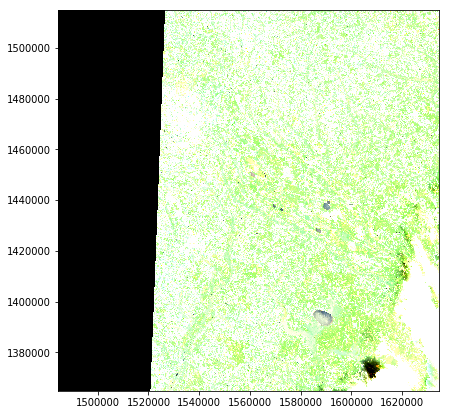

In [10]:
import matplotlib.pyplot as plt
from rasterio.plot import show_hist

full_img = image_dataset.read()
clipped_img = full_img[[3, 2, 1], :, :]
print(clipped_img.shape)
fig, ax = plt.subplots(figsize=(10,7))
show(clipped_img[:, :, :], ax=ax, transform=image_dataset.transform) # add the transform arg to get it in lat long coords

#### Not very informative...

Let's try to normalize it with the built in rasterio adjust_band function

Text(0.5, 1.0, 'RGB in matplotlib imshow')

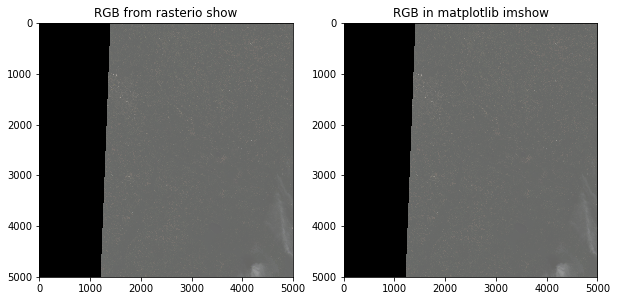

In [11]:
from rasterio.plot import adjust_band, show_hist

img_norm = adjust_band(clipped_img) # normalize bands to range between 1.0 to 0.0
img_reshaped = reshape_as_image(img_norm) # reshape to [rows, cols, bands]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# the rasterio show function takes in [bands, rows, cols] so we don't need to reshape
show(img_norm, ax=axs[0])
axs[0].set_title("RGB from rasterio show")

# plot with normal matplotlib functions
axs[1].imshow(img_reshaped)
axs[1].set_title("RGB in matplotlib imshow")

Still not very useful, let's check out the historgram and normalize it ourselves

In [12]:
print(np.amax(full_img))
print(np.amin(full_img))

15917
-9999


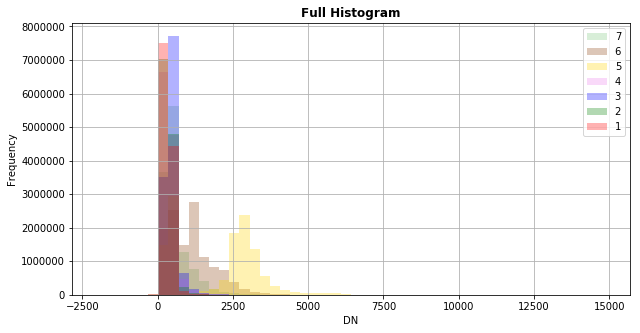

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
show_hist(image_dataset, ax=ax, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="Full Histogram")

In [13]:
from rasterio.plot import reshape_as_raster, reshape_as_image

# Extract reference to SWIR1, NIR, and Red bands
index = np.array([3, 2, 1])
colors = full_img[index, :, :].astype(np.float64)

max_val = 4000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[0]):
    colors[b, :, :] = colors[b, :, :] * 1 / (max_val - min_val)

# rasters are in the format [bands, rows, cols] whereas images are typically [rows, cols, bands]
# and so our array needs to be reshaped
print(colors.shape)
colors_reshaped = reshape_as_image(colors)
print(colors_reshaped.shape)

(3, 5000, 5000)
(5000, 5000, 3)


Text(0.5, 1.0, 'RGB in matplotlib imshow')

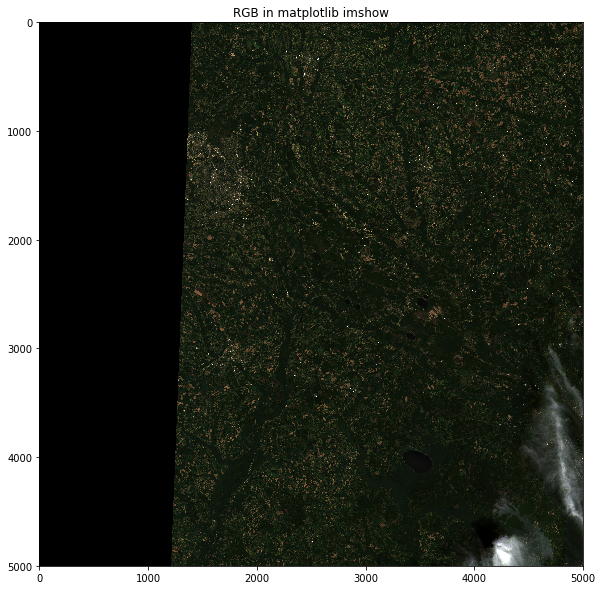

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

# plot with normal matplotlib functions
ax.imshow(colors_reshaped)
ax.set_title("RGB in matplotlib imshow")

### okay that's what it should really look like!

(1, 5000, 5000)


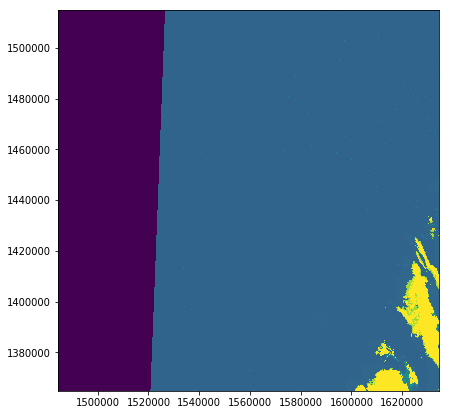

In [15]:
#### now let's check out the quality band
clipped_img = full_img[[7], :, :]
print(clipped_img.shape)
fig, ax = plt.subplots(figsize=(10,7))
show(clipped_img[:, :, :], ax=ax, transform=image_dataset.transform)
# show(clipped_img[:, :, :], ax=ax, transform=image_dataset.transform) # add the transform arg to get it in lat long coords

Looks good too!

In [16]:
from pyproj import transform
# this will get our four corner points
raster_utm_points = image_dataset.transform * (0, 0), image_dataset.transform * (image_dataset.width, 0), image_dataset.transform * (image_dataset.width, image_dataset.height), image_dataset.transform * (0, image_dataset.height)

# Project all longitudes, latitudes using the pyproj package
p1 = Proj(image_dataset.crs) # our current crs
p2 = Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs ") # the crs we want our raster to be in

# use the pyproj.transform function to convert the positions to longs, lats
lats, longs = transform(p1, p2, np.array(raster_utm_points)[:,0],np.array(raster_utm_points)[:,1])

raster_gps_points = list(zip(lats, longs)) # zip up the points so they're in the form [(lat, long), ...]

print('raster bounds in UTM 18N:\n', raster_utm_points, '\n')
print('raster bounds in lat, lon:\n', raster_gps_points)

raster bounds in UTM 18N:
 ((1484415.0, 1514805.0), (1634415.0, 1514805.0), (1634415.0, 1364805.0), (1484415.0, 1364805.0)) 

raster bounds in lat, lon:
 [(-79.40507192506966, 35.51886361214416), (-77.7671965255445, 35.27465758044477), (-78.07896077506945, 33.957621537811946), (-79.69000760805608, 34.198029812561515)]


In [17]:
import folium # let's make an interactive map using leaflet

# folium requires lat, long but dataset.transform outputs long, lat so reversing them:
raster_gps_reversed = list(zip(np.array(raster_gps_points)[:,1], np.array(raster_gps_points)[:,0]))

# creating these points just to set the map center
lat, long = raster_gps_reversed[1] 

# create the folium map object
m = folium.Map(location=[lat, long], zoom_start=11) # set the map centered around the first point

# this actually adds the polygon to the map
folium.Polygon(raster_gps_reversed, 
               popup='Sentinel-2 Image Bounds',
               color='#3186cc',
               fill=True,
               fill_color='#3186cc'
              ).add_to(m)

m

In [18]:
image_dataset.close()

### Sentinel Hub Downloading

In [19]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [20]:
INSTANCE_ID = '6a0eba64-c94f-495b-bb32-5e9122bf4318'  # In case you put instance ID into configuration file you can leave this unchanged

from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

In [21]:
from sentinelhub import DataSource

In [22]:
max_lat = round(np.amax(np.array(raster_gps_reversed)[:,0]), 5)
min_lat = round(np.amin(np.array(raster_gps_reversed)[:,0]), 5)

max_long = round(np.amax(np.array(raster_gps_reversed)[:,1]), 5)
min_long = round(np.amin(np.array(raster_gps_reversed)[:,1]), 5)

landsat8_coords_wgs84 = [min_long,min_lat, max_long, max_lat]

landsat8_bbox = BBox(bbox=landsat8_coords_wgs84, crs=CRS.WGS84)

In [23]:
landsat8_bbox.geojson

{'coordinates': (((-79.69001, 33.95762),
   (-79.69001, 35.51886),
   (-77.7672, 35.51886),
   (-77.7672, 33.95762),
   (-79.69001, 33.95762)),),
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'type': 'Polygon'}

In [41]:
data_path = '/deep_data/sentinel_sar/' + l8_filename.split('/')[-1].split('.')[0]

s1_request = WmsRequest(data_folder=data_path,
                         data_source=DataSource.SENTINEL1_IW,
                         layer='BANDS-S1-IW',
                         bbox=landsat8_bbox,
                         time=(start_date, end_date),
                         width=3000,
                         image_format=MimeType.TIFF_d32f,
                         instance_id=INSTANCE_ID)

s1_data = s1_request.get_data(save_data=True)
# s1_data = s1_request.save_data() # could save directly to file
len(s1_data)

5

In [42]:
np.array(s1_data).shape

(5, 3088, 3000, 2)

In [44]:
from glob import glob
# this finds all files that have SRB at the end which stands for Surface Reflectance Band and then will have the band number
sent1_band_paths = glob(data_path + '/*tiff*')

In [45]:
sar_images = []
for fp in sent1_band_paths:
    dataset = rasterio.open(fp)
    sar_images.append(dataset.read())
    dataset.close()
    
sar_images = np.array(sar_images)

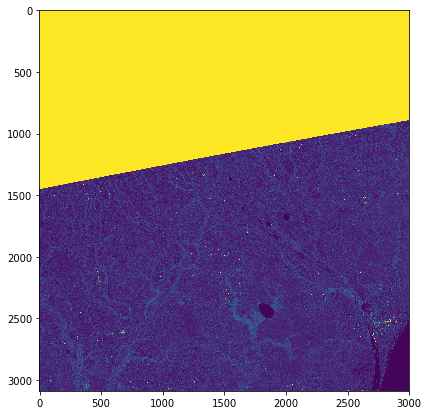

In [46]:
plot_image(sar_images[0,0,:,:])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


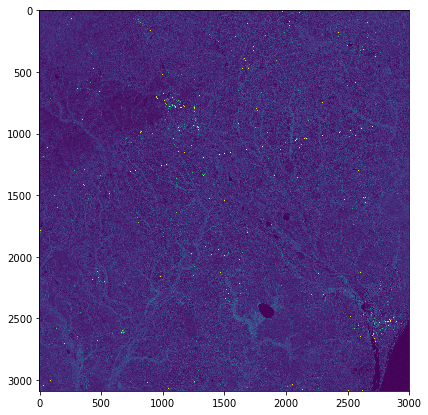

In [47]:
sar_images[sar_images==1.0]=np.nan
average_image = np.nanmean(sar_images, axis=0)

plot_image(average_image[0])

In [48]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [49]:
# TODO this interpolation method really should be 2D and should not try to interpolate when the closest 
# non-NAN value is greater than ~3 pixels away
nans, x = nan_helper(average_image)
average_image[nans] = np.interp(x(nans), x(~nans), average_image[~nans])

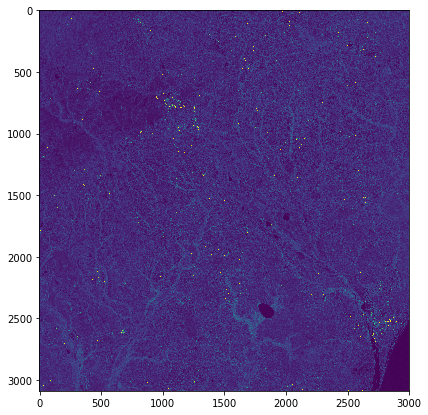

In [50]:
plot_image(average_image[0])

In [52]:
sent1_fn = data_path + '/' + l8_filename.split('/')[-1].split('.')[0] + '_combined.tif'
# Register GDAL format drivers and configuration options with a
# context manager.
with rasterio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
    # Read metadata of first file and assume all other bands are the same
    with rasterio.open(sent1_band_paths[0]) as src0:
        meta = src0.meta

    with rasterio.open(sent1_fn, 'w', **meta) as dst:
        dst.write(average_image, [1,2])

# At the end of the ``with rasterio.Env()`` block, context
# manager exits and all drivers are de-registered.

In [53]:
image_dataset = rasterio.open(sent1_fn)
# How many bands does this image have?
num_bands = image_dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = image_dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# What driver was used to open the raster?
driver = image_dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = image_dataset.crs
print('Image projection:')
print(proj)

pixelSizeX, pixelSizeY  = image_dataset.res
print(pixelSizeX)
print(pixelSizeY)

Number of bands in image: 2

Image size is: 3088 rows x 3000 columns

Raster driver: GTiff

Image projection:
EPSG:4326
0.0006409366666666661
0.0005055829015544035


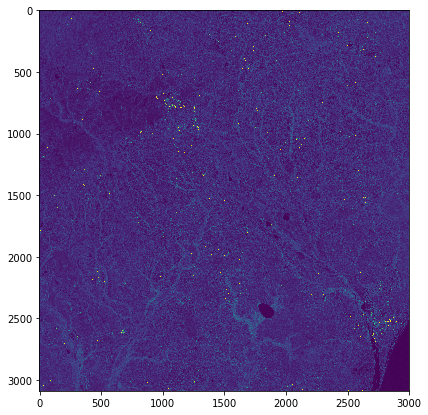

In [54]:
plot_image(image_dataset.read()[0,:,:])

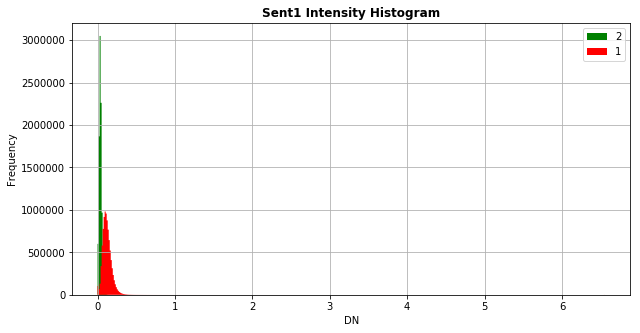

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
show_hist(image_dataset, ax=ax, bins=500, lw=0.0, stacked=False, histtype='stepfilled', title="Sent1 Intensity Histogram")

In [57]:
s1_raster_gps_points = image_dataset.transform * (0, 0), image_dataset.transform * (image_dataset.width, 0), image_dataset.transform * (image_dataset.width, image_dataset.height), image_dataset.transform * (0, image_dataset.height)

# folium requires lat, long but dataset.transform outputs long, lat so reversing them:
s1_raster_gps_reversed = list(zip(np.array(s1_raster_gps_points)[:,1], np.array(s1_raster_gps_points)[:,0]))

# creating these points just to set the map center
lat, long = s1_raster_gps_reversed[1] 

# create the folium map object
m = folium.Map(location=[lat, long], zoom_start=8) # set the map centered around the first point

# this actually adds the polygon to the map
folium.Polygon(raster_gps_reversed, 
               popup='Landsat 8 Image Bounds',
               color='#800080',
               fill=True,
               fill_color='#800080'
              ).add_to(m)

folium.Polygon(s1_raster_gps_reversed, 
               popup='Sentinel-1 Image Bounds',
               color='#3186cc',
               fill=True,
               fill_color='#3186cc'
              ).add_to(m)

m